# Margin Analysis

## Introduction
This project focuses on analyzing and optimizing profit margins of a retail business. The dataset consisted of transactional data which contained all the transactions occurring from 2020-01-01 up to 2023-12-31. The data were extracted from the client's CRM system. The business mainly sells furniture, technology and office supplies. Many customers of the company are wholesalers. Each row represents the transaction that occurs. (Note: The data has been altered to protect the innocent.)

## Tasks
My tasks involved answering the following questions from the stakeholders:
* Who are our most profitable customers?
* Which customers are costing us money?
* Which customer segments should we focus on growing or saving?
* How well are we retaining customers over time?
* Are our recent retention efforts working?
* When do our customers drop-off?
* Which regions or categories are driving or draining profitability?
* How can we grow profits without acquiring more customers?

## Deliverables
* A written report of the analysis with visualizations, insights and actionable recommendations
* At a later time, once the results were approved, a presentation should be prepared for C-level executives

## My process
* Initial Data Exploration
* Data Extraction
* Data Profiling
* Data Cleaning (removing duplicates, handling missing values, standardizing data, validity checks etc.)
* Data Transformation
* Exploratory Data Analysis
* Main Data Analysis

## Analysis techniques used:
* Margin Trend Analysis
<br>
Rationale: It identifies which categories, regions, and time periods are profitable and which are draining value

* Margin Variance Analysis
<br>
Rationale: It enables better resource allocation by scaling high-margin areas and fixing or phasing out low-margin ones

* Customer Segmentation Analysis (K-Means, RFM)
<br>
Rationale: It reveals who to retain, who to win back, and who not to chase, leading to smarter retention and marketing decisions

* Cohort Analysis
<br>
Rationale: It shows which acquisition efforts deliver long-term value and which don’t. It’s a key tool for improving lifetime value and reducing churn

## Tools used
My choice of tools were:
* Excel
* Python
* Powerpoint

Here we go!

# Setup the Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
# Load CSV file into a dataframe
working_dir = "E:/backup17092018/Myappdir/Myprojects/Data Science/Portfolio Projects/160 Margin Analysis/"
file_name = 'margin_analysis_data_cleaned.csv'

df = pd.read_csv(working_dir + file_name, header=0, delimiter=',')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,City,State,Country,Region,Market,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer Name,Segment,Returned,Person,Priority ID,Product Name,Category,Sub-Category,Price,Discount Amount,Returned Amount,Net Sales,COGS Per Line,Cost Per Line,Markup Ratio,Gross Profit Ratio,Net Profit Margin,Net Profit Margin Ratio,Contribution After Shipping,Discount To Profit Ratio,Shipping Cost To Sales Ratio,Shipping Cost To Profit Ratio,Days To Ship,Order Month,Order Quarter
0,24599,IN-2017-CA120551-42816,2023-03-22,2023-03-29,Standard Class,CA-120551,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,731.82,2,0.0,102.42,39.660,Medium,Cathy Armstrong,Home Office,1,Chandrakant Chaudhri,4,"Ikea Library with Doors, Mobile",Furniture,Bookcases,365.91,0.0,731.82,0.00,629.40,669.060,0.162726,0.139952,-669.060,-0.914241,62.760,0.0,0.054194,0.387229,7,2023-03,2023Q1
1,29465,ID-2015-BD116051-42248,2021-09-01,2021-09-04,Second Class,BD-116051,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,243.54,9,0.0,104.49,18.720,Medium,Brian Dahlen,Consumer,0,Chandrakant Chaudhri,4,"Acme Scissors, Easy Grip",Office Supplies,Supplies,27.06,0.0,0.00,243.54,139.05,157.770,0.751456,0.429047,85.770,0.352180,85.770,0.0,0.076866,0.179156,3,2021-09,2021Q3
2,24598,IN-2017-CA120551-42816,2023-03-22,2023-03-29,Standard Class,CA-120551,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,TEC-MA-4211,346.32,3,0.0,13.77,14.100,Medium,Cathy Armstrong,Home Office,1,Chandrakant Chaudhri,4,"Epson Receipt Printer, White",Technology,Machines,115.44,0.0,346.32,0.00,332.55,346.650,0.041407,0.039761,-346.650,-1.000953,-0.330,0.0,0.040714,1.023965,7,2023-03,2023Q1
3,24597,IN-2017-CA120551-42816,2023-03-22,2023-03-29,Standard Class,CA-120551,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-FU-5726,169.68,4,0.0,79.68,11.010,Medium,Cathy Armstrong,Home Office,1,Chandrakant Chaudhri,4,"Rubbermaid Door Stop, Erganomic",Furniture,Furnishings,42.42,0.0,169.68,0.00,90.00,101.010,0.885333,0.469590,-101.010,-0.595297,68.670,0.0,0.064887,0.138178,7,2023-03,2023Q1
4,29464,ID-2015-BD116051-42248,2021-09-01,2021-09-04,Second Class,BD-116051,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-EN-3664,203.88,4,0.0,24.36,5.720,Medium,Brian Dahlen,Consumer,0,Chandrakant Chaudhri,4,"Cameo Interoffice Envelope, with clear poly wi...",Office Supplies,Envelopes,50.97,0.0,0.00,203.88,179.52,185.240,0.135695,0.119482,18.640,0.091426,18.640,0.0,0.028056,0.234811,3,2021-09,2021Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50610,4109,MX-2014-DM1334582-42000,2020-12-27,2020-12-30,Second Class,DM-1334582,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-FA-5477,68.28,6,0.0,0.60,4.187,Medium,Denise Monton,Corporate,0,Nicodemo Bautista,4,"OIC Rubber Bands, Bulk Pack",Office Supplies,Fasteners,11.38,0.0,0.00,68.28,67.68,71.867,0.008865,0.008787,-3.587,-0.052534,-3.587,0.0,0.061321,6.978333,3,2020-12,2020Q4
50611,6151,MX-2014-DB1355582-41890,2020-09-08,2020-09-10,Second Class,DB-1355582,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-AP-4496,54.40,2,0.0,3.80,4.064,Medium,Dorothy Badders,Corporate,0,Nicodemo Bautista,4,"Hamilton Beach Coffee Grinder, White",Office Supplies,Appliances,27.20,0.0,0.00,54.40,50.60,54.664,0.075099,0.069853,-0.264,-0.004853,-0.264,0.0,0.074706,1.069474,2,2020-09,2020Q3
50612,6864,MX-2015-BF1097582-42162,2021-06-07,2021-06-11,Standard Class,BF-1097582,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-EN-3111,29.64,2,0.0,0.28,3.820,High,Barbara Fisher,Corporate,0,Nicodemo Bautista,2,"Ames Peel and Seal, with clear poly window",Office Supplies,Envelopes,14.82,0.0,0.00,29.64,29.36,33.180,0.009537,0.009447,-3.540,-0.119433,-3.540,0.0,0.128880,13.642857,4,2021-06,2021Q2
50613,86,MX-2017-CS1235582-42757,2023-01-22,2023-01-27,St

# Margin Trend Analysis

* For the main analysis, Net Profit Margin will be used as a margin (profit) indicator unless stated otherwise
<br>
Net Profit Margin = Sales - Discount - Returns - Shipping Cost

### Monthly Trend of Net Profit Margin Ratio

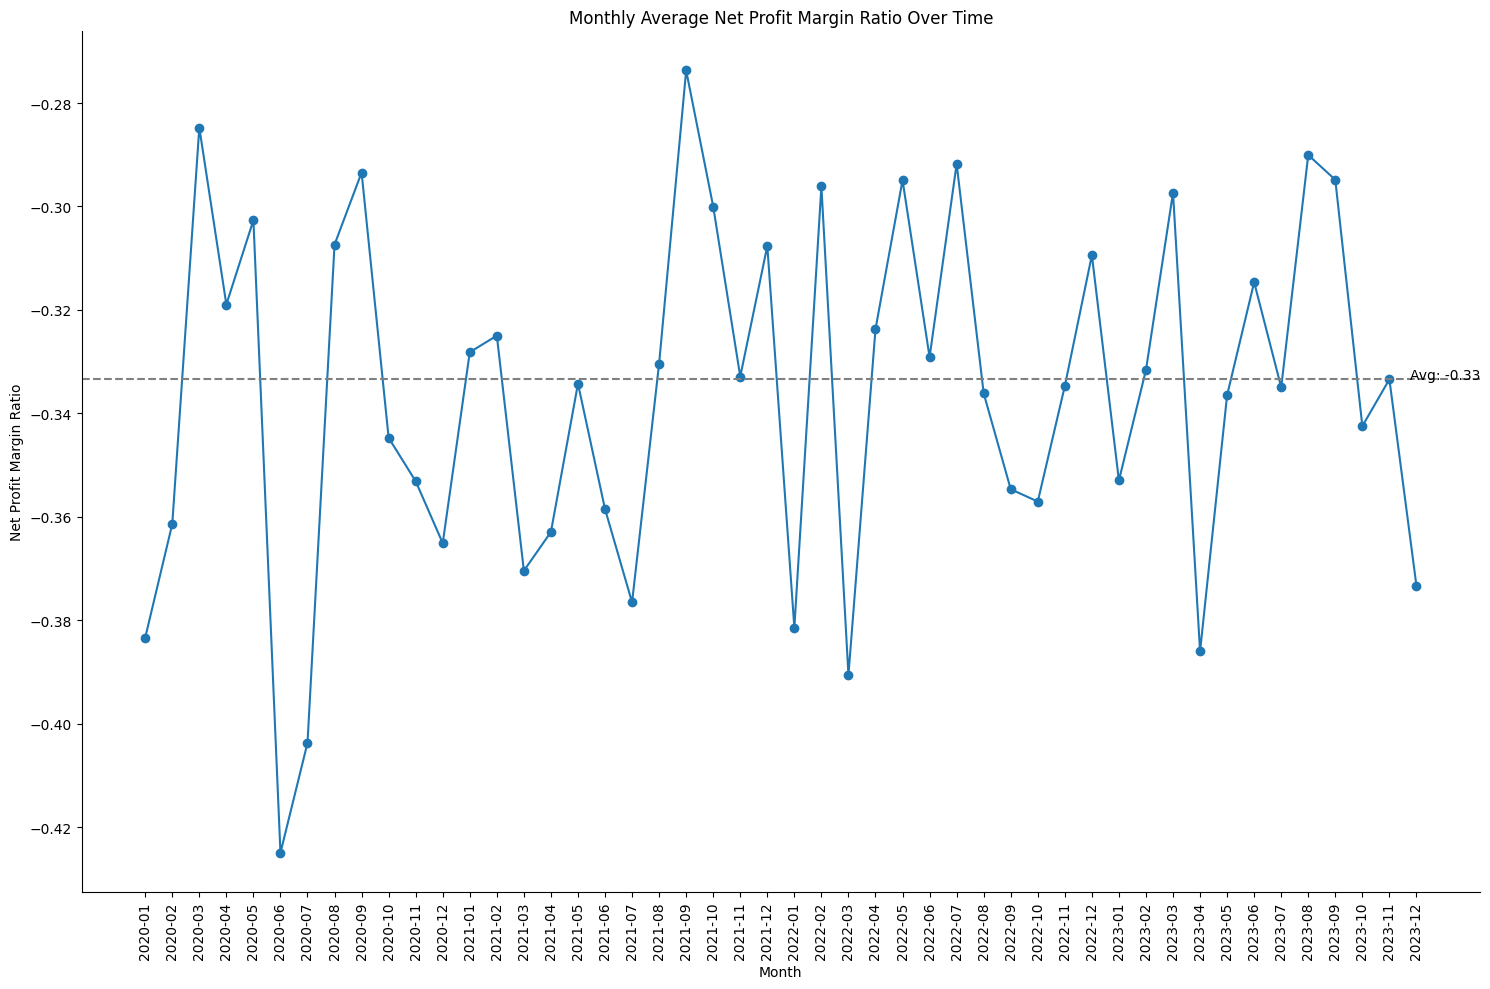

In [3]:
# Compute monthly average Net Profit Margin
monthly_margin = df.groupby('Order Month')['Net Profit Margin Ratio'].mean().reset_index()
avg_margin = df['Net Profit Margin Ratio'].mean()

# Plot overall trend
plt.figure(figsize=(15, 10))
plt.plot(monthly_margin['Order Month'], monthly_margin['Net Profit Margin Ratio'], marker='o')

# Draw average line
plt.axhline(avg_margin, color='gray', linestyle='--')
plt.annotate(f"Avg: {avg_margin:.2f}", xy=(1,avg_margin), xycoords=plt.gca().get_yaxis_transform(), ha="right")

plt.title('Monthly Average Net Profit Margin Ratio Over Time')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Net Profit Margin Ratio', fontsize=10)
sns.despine()
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Insights:
* Over a 4-year period (2020–2023), the business has consistently operated at a negative Net Profit Margin, averaging -33%
* Margins fluctuate month-to-month without a clear improvement trend, with notable dips in June 2020, March 2022, and April 2023

### Quarterly Trend of Net Profit Margin by Category

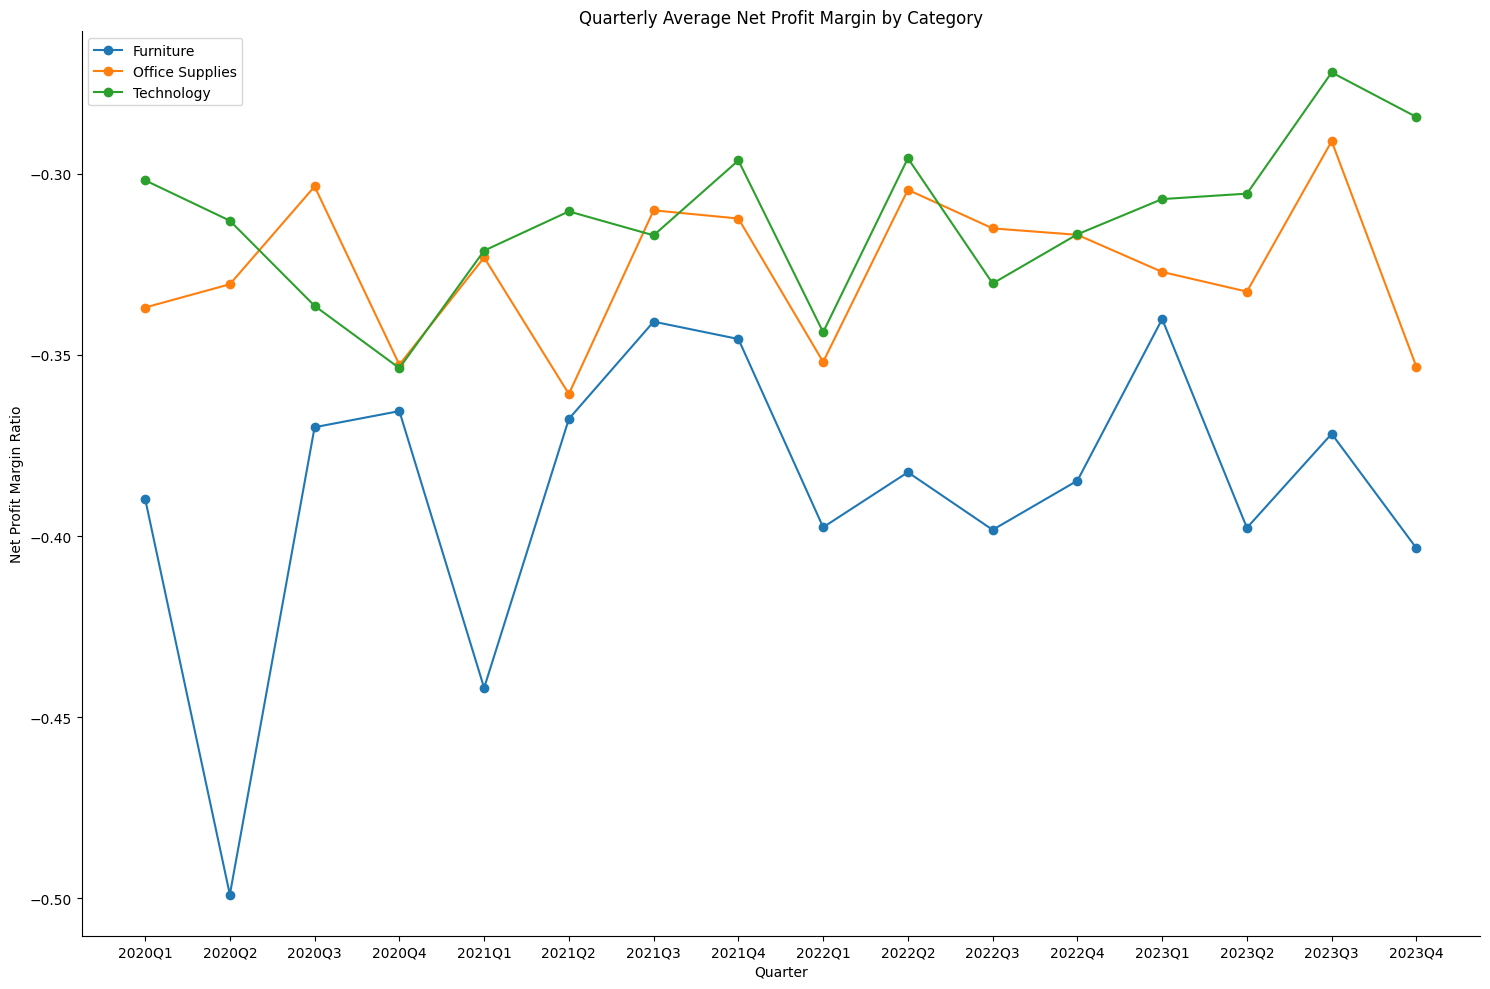

In [4]:
# Compute quarterly Net Profit Margin by Category
category_quarterly = df.groupby(['Order Quarter', 'Category'])['Net Profit Margin Ratio'].mean().unstack()

# Plot category trends
plt.figure(figsize=(15, 10))
for cat in category_quarterly.columns:
    plt.plot(category_quarterly.index, category_quarterly[cat], marker='o', label=cat)

plt.title('Quarterly Average Net Profit Margin by Category')
plt.xlabel('Quarter', fontsize=10)
plt.ylabel('Net Profit Margin Ratio', fontsize=10)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

#### Insights:
* Each product category operates with negative net profit margins over the observed 4-year period
* Technology consistently outperforms the other two categories in terms of profitability
* Furniture underperforms throughout, with recurring deep margin losses nearing -50% in some quarters
* Office Supplies show relative stability with margins between -29% and -36%

# Margin Variance Analysis

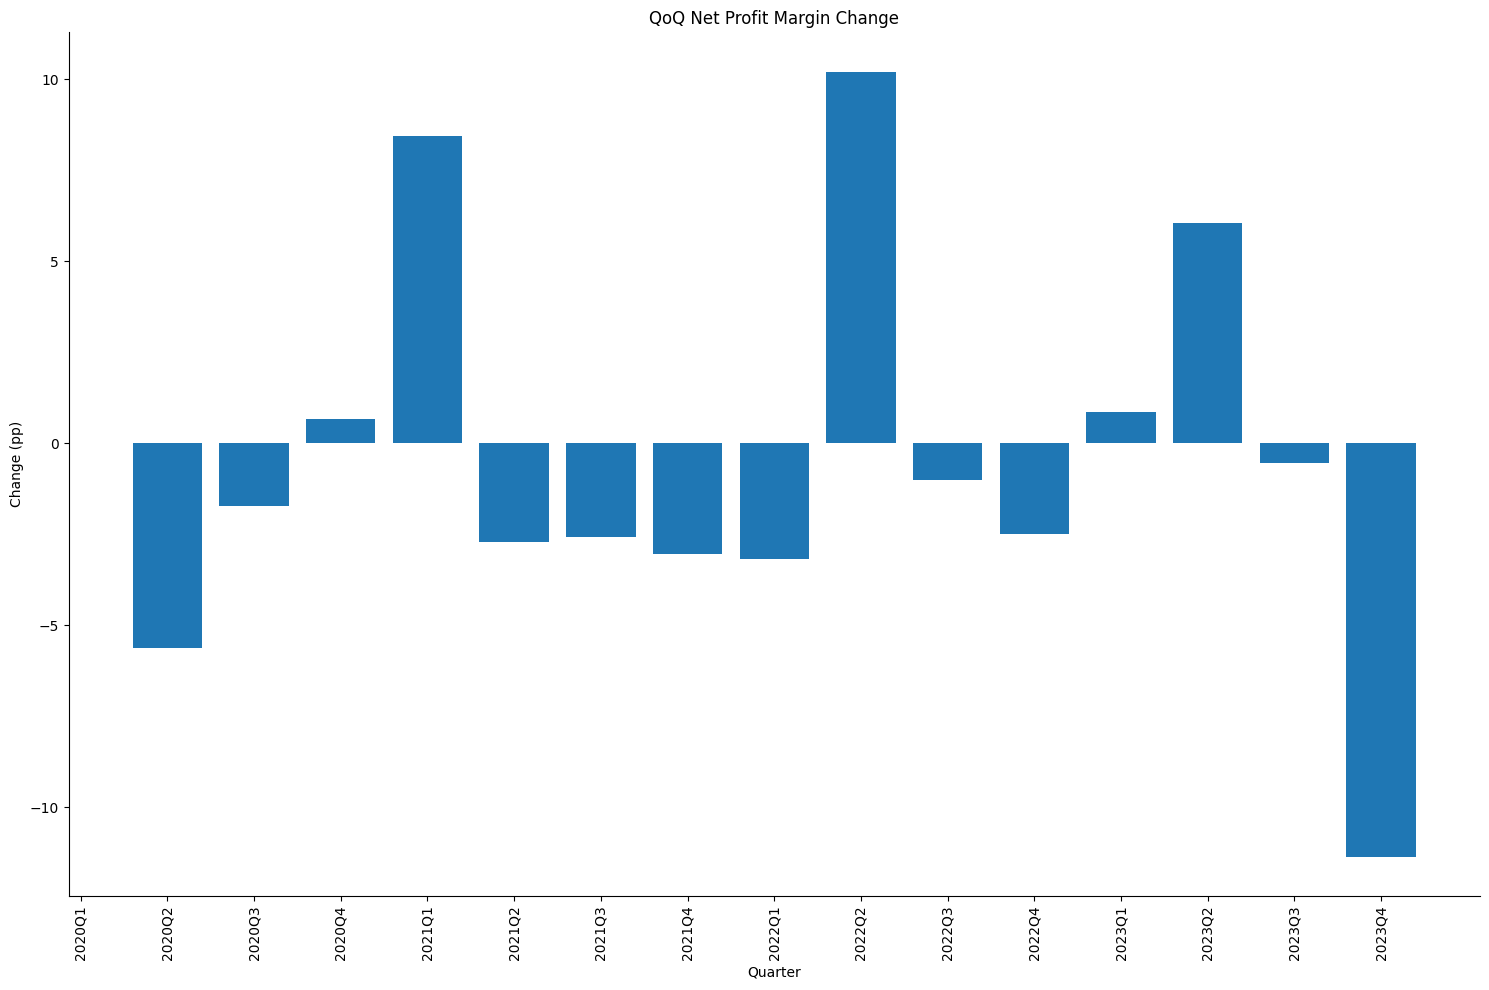

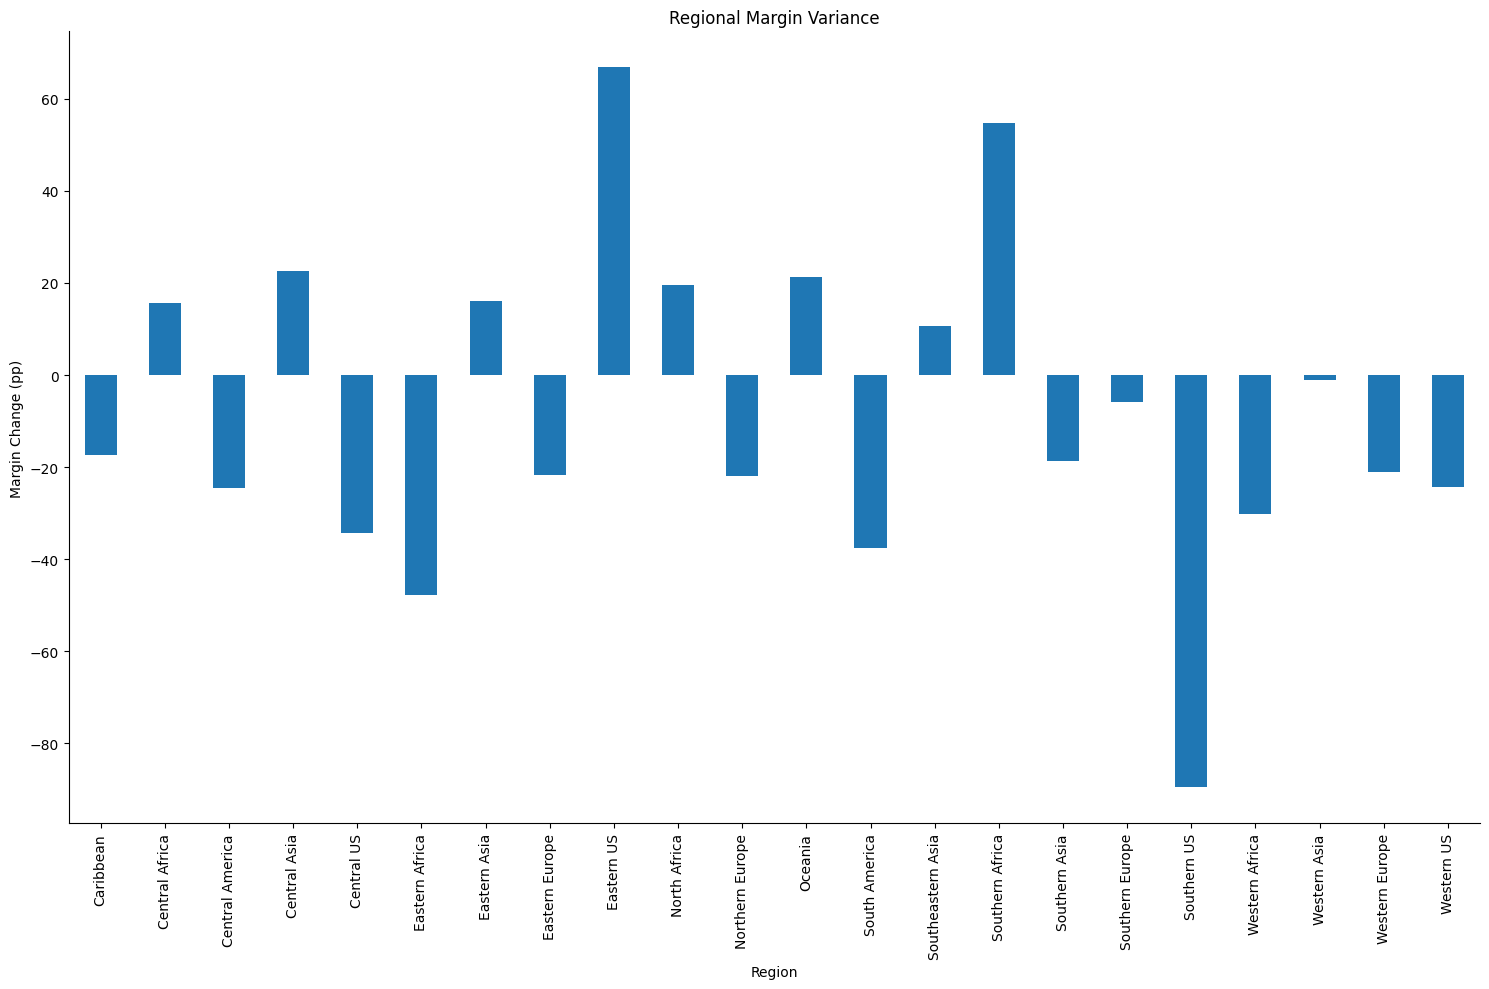

In [5]:
# Prepare data
quarterly_overall = df.groupby('Order Quarter')['Net Profit Margin'].mean().reset_index()
quarterly_overall['QoQ Change'] = quarterly_overall['Net Profit Margin'].diff()
category_q = df.groupby(['Order Quarter', 'Category'])['Net Profit Margin'].mean().unstack()
region_q = df.groupby(['Order Quarter', 'Region'])['Net Profit Margin'].mean().unstack()
latest_q = quarterly_overall['Order Quarter'].max()
prev_q = quarterly_overall['Order Quarter'].iloc[-2]
category_var = category_q.loc[latest_q] - category_q.loc[prev_q]
region_var = region_q.loc[latest_q] - region_q.loc[prev_q]

# Plot QoQ Change
plt.figure(figsize=(15, 10))
plt.bar(quarterly_overall['Order Quarter'], quarterly_overall['QoQ Change'])
plt.title('QoQ Net Profit Margin Change')
plt.xlabel('Quarter')
plt.ylabel('Change (pp)')

# # Add trendline
# x = np.arange(len(quarterly_overall['Order Quarter']))  # Create numerical x values
# y = quarterly_overall['QoQ Change'].values
# mask = ~np.isnan(y)
# x_valid = x[mask]
# y_valid = y[mask]
# coeffs = np.polyfit(x_valid, y_valid, 1)
# trend = np.poly1d(coeffs)
# # plt.scatter(x=x_valid, y=trend(x_valid), linewidth=1, linestyle='--', color='grey')
# x_line = np.linspace(x_valid.min(), x_valid.max(), 100)
# plt.plot(quarterly_overall['Order Quarter'].iloc[x_line.astype(int)], trend(x_line), linewidth=1, linestyle='--', color='grey')

sns.despine()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot Regional Variance
plt.figure(figsize=(15, 10))
region_var.plot(kind='bar')
plt.title(f'Regional Margin Variance')
plt.xlabel('Region', fontsize=10)
plt.ylabel('Margin Change (pp)', fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

#### Insights:
* Significant volatility in net profit margins across 4 years
* 12 of 16 quarters show negative QoQ changes, suggesting a recurring inability to sustain margin improvements

* Largest improvements:
<br>
2021Q1: +8.3%, 2022Q2: +10.2%, 2023Q2: +6.1%

* Largest declines:
<br>
2023Q4: -11.2%, 2020Q2: -5.6%
* Multiple smaller declines between 2021Q2 and 2022Q1
* There is extreme variability in margin performance by region, with both large positive and large negative shifts
* Top-performing regions (positive margin change):
<br>
Eastern US: ~+67%, Southeastern Africa: ~+55%, Central Asia, Eastern Asia, Oceania: ~+20% to +25%
* Worst-performing regions (negative margin change):
<br>
Southern US: ~-87%, Eastern Africa: ~-53%, Central US, Southern Africa, Southern Europe: ~-30% to -40%

# Customer Segmentation by Sales (K_Means Analysis)

### Create Recency Frequency Monetary (RFM) table

In [6]:
print('Start date:' , df['Order Date'].min())
print('End date:' , df['Order Date'].max())

Start date: 2020-01-01
End date: 2023-12-31


In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

In [8]:
# Create RFM table
# Aggregate data by each customer
rfm = df.groupby('Customer ID').agg({'Order Date': lambda x: (snapshot_date - x.max()).days, 'Order ID': lambda x: len(x), 'Sales': lambda x: x.sum()}).reset_index()
rfm['Order Date'] = rfm['Order Date'].astype(int)

# Rename columns
rfm.rename(columns={'Order Date': 'Recency', 
                         'Order ID': 'Frequency', 
                         'Sales': 'MonetaryValue'}, inplace=True)
rfm

,Customer ID,Recency,Frequency,MonetaryValue
0,AA-10315102,359,6,544.6560
1,AA-10315120,960,1,2713.4100
2,AA-10315139,150,13,2955.7980
3,AA-103151402,185,6,4780.5520
4,AA-103151404,819,3,753.5080
...,...,...,...,...
17160,ZD-2192548,751,4,1302.1680
17161,ZD-2192564,1410,4,1225.3920
17162,ZD-219257,1199,1,59.9400
17163,ZD-2192582,197,2,678.1014


In [9]:
# By using this transformation, we will have data that is less skewed
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(rfm['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(rfm['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(rfm['MonetaryValue'])).values
customers_fix

,Recency,Frequency,MonetaryValue
0,23.332887,1.380858,8.166590
1,35.614385,0.000000,13.947782
2,15.791074,1.780009,14.351311
3,17.373654,1.380858,16.845840
4,33.294307,0.933698,9.099746
...,...,...,...
17160,32.088389,1.130805,10.919992
17161,41.869862,1.130805,10.701016
17162,39.115772,0.000000,3.913562
17163,17.874014,0.624866,8.785468


In [10]:
# Normalize data
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)

# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) 
print(customers_normalized.std(axis = 0).round(2))
pd.DataFrame(customers_normalized).head()

[ 0.  0. -0.]
[1. 1. 1.]


,0,1,2
0,-0.108079,1.311580,0.203841
1,1.079569,-1.193716,1.820022
2,-0.837389,2.035761,1.932832
3,-0.684350,1.311580,2.630199
4,0.855212,0.500297,0.464713


### Determine the Optimal K (Elbow Method)

<function matplotlib.pyplot.show(close=None, block=None)>

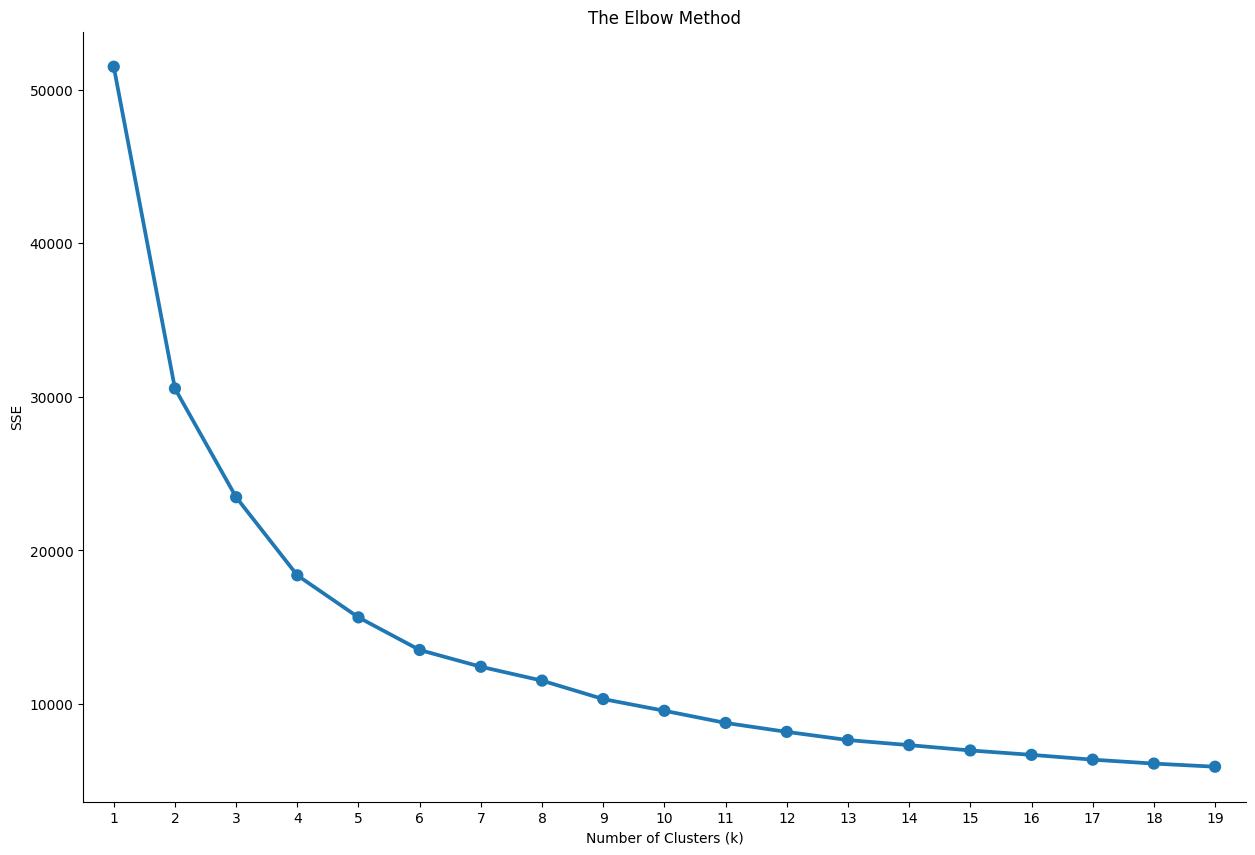

In [11]:
K = range(1, 20)
distortions = []
inertias = []
mapping1 = {}
sse = {}

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(customers_normalized)
    
    distortions.append(sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / customers_normalized.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / customers_normalized.shape[0]
    
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.figure(figsize=(15, 10))
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('SSE', fontsize=10)
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
sns.despine()
plt.show

In [12]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.6229992900467265
2 : 1.2452790869767203
3 : 1.1001265724024927
4 : 0.961347914724775
5 : 0.8819408598622004
6 : 0.8141721031481064
7 : 0.7819449402456735
8 : 0.7447406698932848
9 : 0.7112511386376047
10 : 0.6811953976718544
11 : 0.6528147089135484
12 : 0.629877340071323
13 : 0.6132874120017621
14 : 0.5989295777913223
15 : 0.5858284948712403
16 : 0.5734400672931276
17 : 0.5594938042878155
18 : 0.5481962744645972
19 : 0.539486201159053


### Fit the model (3 clusters)

In [13]:
model = KMeans(n_clusters=3, random_state=123)
model.fit(customers_normalized)
model.labels_.shape

rfm["Cluster"] = model.labels_
rfm.head()

rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         148.9       1.8         239.3  4219
1         393.7       5.2        1579.2  6191
2         845.4       1.6         255.7  6755

### Fit the model (4 clusters)

In [14]:
model = KMeans(n_clusters=4, random_state=123)
model.fit(customers_normalized)
model.labels_.shape

rfm["Cluster"] = model.labels_
rfm.head()

rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         187.6       5.9        1872.7  3773
1         757.2       3.4         799.0  4683
2         147.5       1.7         229.6  3933
3         825.4       1.2         168.1  4776

#### Insights
* The "elbow point" at k=4 indicates the optimal number of clusters

### Cluster exploration

In [15]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = rfm.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-0.108079,1.311580,0.203841,0,1
1,1.079569,-1.193716,1.820022,1,1
2,-0.837389,2.035761,1.932832,2,0
3,-0.684350,1.311580,2.630199,3,0
4,0.855212,0.500297,0.464713,4,1


In [16]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,0,1,Recency,-0.108079
1,1,1,Recency,1.079569
2,2,0,Recency,-0.837389
3,3,0,Recency,-0.684350
4,4,1,Recency,0.855212


In [17]:
df_nor_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51495 entries, 0 to 51494
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         51495 non-null  int64  
 1   Cluster    51495 non-null  int32  
 2   Attribute  51495 non-null  object 
 3   Value      51495 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 1.4+ MB


In [18]:
# Aggregate data by each customer
fig3 = df_nor_melt.groupby('Cluster').agg({'ID': lambda x: len(x)}).reset_index()

# Rename columns
fig3.rename(columns={'ID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

,Cluster,Count,percent
0,0,11319,22.0
1,1,14049,27.3
2,2,11799,22.9
3,3,14328,27.8


### Scatter plots

In [19]:
rfm_fig = rfm.copy()

# Remove outliers for visualization
y1 = rfm_fig['Frequency']
size = rfm_fig.shape[0]
removed_outliers = y1.between(y1.quantile(.05), y1.quantile(.95))
print(str(y1[removed_outliers].size) + "/" + str(size) + " data points remain") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

# Remove outliers for visualization
y2 = rfm_fig['Recency']
size = rfm_fig.shape[0]
removed_outliers = y2.between(y2.quantile(.05), y2.quantile(.95))
print(str(y2[removed_outliers].size) + "/" + str(size) + " data points remain") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

# Remove outliers for visualization
y3 = rfm_fig['MonetaryValue']
size = rfm_fig.shape[0]
removed_outliers = y3.between(y3.quantile(.05), y3.quantile(.95))
print(str(y3[removed_outliers].size) + "/" + str(size) + " data points remain") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

16512/17165 data points remain
14872/16512 data points remain
13384/14872 data points remain


### Frequency vs Recency

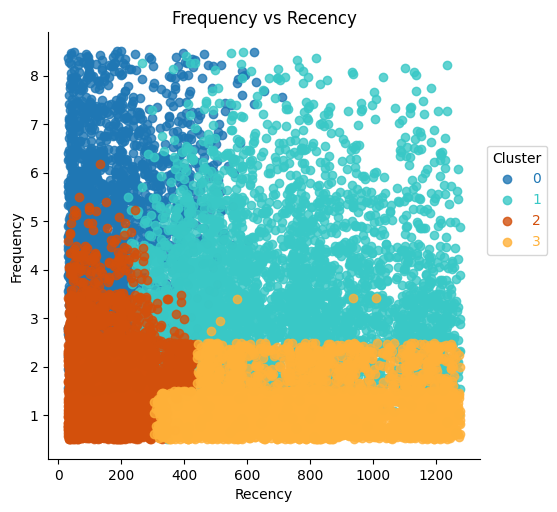

In [20]:
# Define a custom palette
customPalette = ["#1F77B4", '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
# sns.palplot(customPalette)

data = pd.DataFrame(data=rfm_fig, columns=['Customer ID','Cluster','Recency','Frequency','MonetaryValue'])

# Plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='Recency', y='Frequency', hue='Cluster', height=5,
                   fit_reg=False, legend=False, y_jitter=0.5).set(title='Frequency vs Recency')

# Add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Cluster", fancybox=True)

# Change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

### Frequency vs Monetary

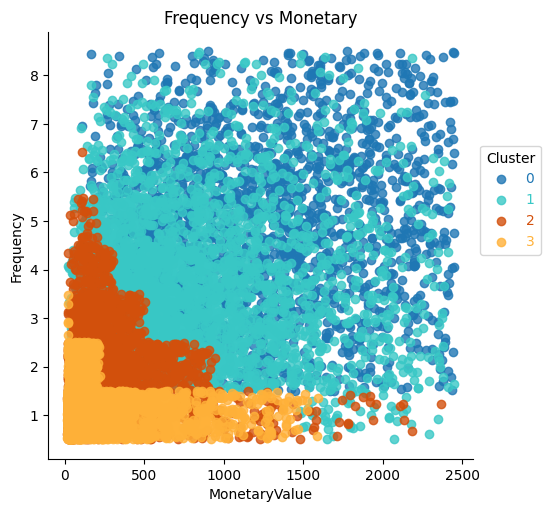

In [21]:
# Plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='MonetaryValue', y='Frequency', hue='Cluster', height=5,
                   fit_reg=False, legend=False, y_jitter=0.5).set(title='Frequency vs Monetary')

# Add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Cluster", fancybox=True)
# Change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

#### Insights
If we overlap the 2 scatter plots and use the above table, we can see that there should be 4 clusters in our data:

* Cluster 0:
<br>
Champions - 22% (High Frequency, Low Recency, High Monetary Value)

* Cluster 1:
<br>
At-Risk - 27.3% (Moderate Frequency, High Recency, Medium to High Monetary)

* Cluster 2:
<br>
New Customers - 22.9% (Moderate Frequency, Low Monetary Value, Low-to-Moderate Recency)

* Cluster 3:
<br>
Hibernating - 27.8 (Low Frequency, High Recency, Low Monetary Value)

# Customer Segmentation by Sales (RFM Analysis-Rule Based)

### Define quartiles for RFM score

In [22]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
    
def RScore(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1   
    
def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5
    
rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm['M'] = rfm['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles,))

### Calculate the RFM score

In [23]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [24]:
rfm['RFM_Segment'].unique()

array(['354', '115', '455', '234', '121', '513', '311', '524', '423',
       '254', '454', '243', '122', '342', '552', '344', '312', '411',
       '212', '353', '555', '124', '415', '143', '355', '111', '445',
       '235', '315', '255', '425', '322', '155', '343', '222', '224',
       '233', '444', '533', '112', '245', '532', '223', '314', '414',
       '323', '132', '421', '433', '313', '332', '213', '113', '512',
       '211', '554', '334', '133', '125', '324', '515', '225', '333',
       '435', '422', '522', '232', '521', '413', '434', '534', '412',
       '145', '511', '531', '335', '432', '452', '321', '221', '545',
       '443', '123', '424', '114', '345', '135', '325', '535', '523',
       '544', '514', '214', '453', '244', '134', '215', '553', '543',
       '231', '341', '331', '542', '154', '144', '253', '241', '153',
       '152', '442', '242', '525', '352', '451', '142', '541', '441',
       '131', '431', '252', '351', '251', '551', '151'], dtype=object)

### Grouping and labeling with RFM labels

In [25]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

# Create human friendly labels for the scores
rfm['Score'] = 'Green'
rfm.loc[rfm['RFM_Score']>5,'Score'] = 'Bronze' 
rfm.loc[rfm['RFM_Score']>7,'Score'] = 'Silver' 
rfm.loc[rfm['RFM_Score']>9,'Score'] = 'Gold' 
rfm.loc[rfm['RFM_Score']>10,'Score'] = 'Platinum'
rfm

,Customer ID,Recency,Frequency,MonetaryValue,Cluster,R,F,M,RFM_Segment,RFM_Score,Segment,Score
0,AA-10315102,359,6,544.6560,1,3,5,4,354,12,Loyal customers,Platinum
1,AA-10315120,960,1,2713.4100,1,1,1,5,115,7,Hibernating,Bronze
2,AA-10315139,150,13,2955.7980,0,4,5,5,455,14,Loyal customers,Platinum
3,AA-103151402,185,6,4780.5520,0,4,5,5,455,14,Loyal customers,Platinum
4,AA-103151404,819,3,753.5080,1,2,3,4,234,9,At risk,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...
17160,ZD-2192548,751,4,1302.1680,1,2,4,5,245,11,At risk,Platinum
17161,ZD-2192564,1410,4,1225.3920,1,1,4,5,145,10,At risk,Gold
17162,ZD-219257,1199,1,59.9400,3,1,1,1,111,3,Hibernating,Green
17163,ZD-2192582,197,2,678.1014,2,4,2,4,424,10,Potential loyalists,Gold


In [26]:
# Export rfm dataframe to .csv
rfm.to_csv(working_dir + 'rfm_segmentation_data.csv', index=False)

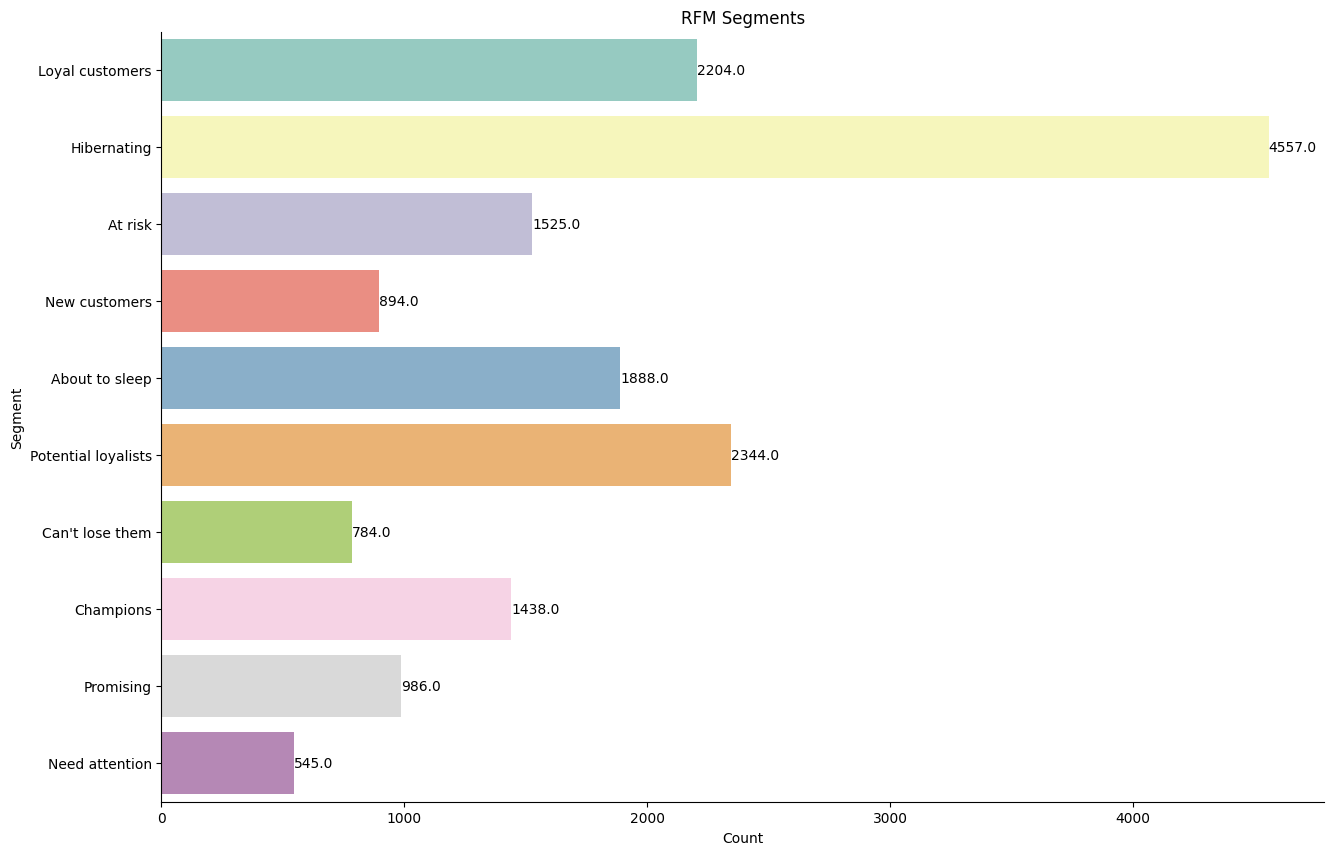

In [27]:
# RFM vertical bar chart (counts)
f, ax=plt.subplots(1, 1, figsize=(15, 10))
sns.countplot(y='Segment', data=rfm, ax=ax, palette="Set3")
ax.set_title('RFM Segments')
ax.set_xlabel('Count', fontsize=10)
# ax.set_ylabel('', fontsize=10)
sns.despine()

# Add data labels for each bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', (width + 1, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10)
plt.show()

#### Insights
* Customers were grouped into 10 RFM-based behavioral segments

* Top segments by customer count are:
<br>
Hibernating (4557), Potential Loyalists (2344) and Loyal Customers (2204)

#### Segment Characteristics & Recommendations
* Champions: Bought recently, buy often and spend the most (Reward them. Can be early adopters for new products. Will promote your brand.)
* Loyal Customers: Buy on a regular basis. Responsive to promotions (Upsell higher value products. Ask for reviews. Engage them.)
* Potential Loyalists: Recent customers with average frequency (Offer membership/loyalty program. Recommend other products.)
* Recent Customers: Bought most recently, but not often (Provide onboarding support. Give them early success. Start building relationship.)
* Promising: Recent shoppers, but haven’t spent much (Create brand awareness. Offer free trials.)
* Needs Attention: Above average recency, frequency and monetary values. May not have bought very recently though (Make limited time offers. Recommend based on past purchases. Reactivate them.)
* About to Sleep: Below average recency and frequency. Will lose them if not reactivated (Share valuable resources. Recommend popular products/renewals at discount. Reconnect with them.)
* At Risk: Some time since they’ve purchased. Need to bring them back (Send personalized emails to reconnect. Offer renewals. Provide helpful resources.)
* Can’t Lose Them: Used to purchase frequently but haven’t returned for a long time (Offer them renewals or new products. Talk to them. Do not lose them to competition.)
* Hibernating: Last purchase was long back and low number of orders. May be lost (Offer other relevant products and special discounts. Recreate brand value.)

# Cohort Analysis

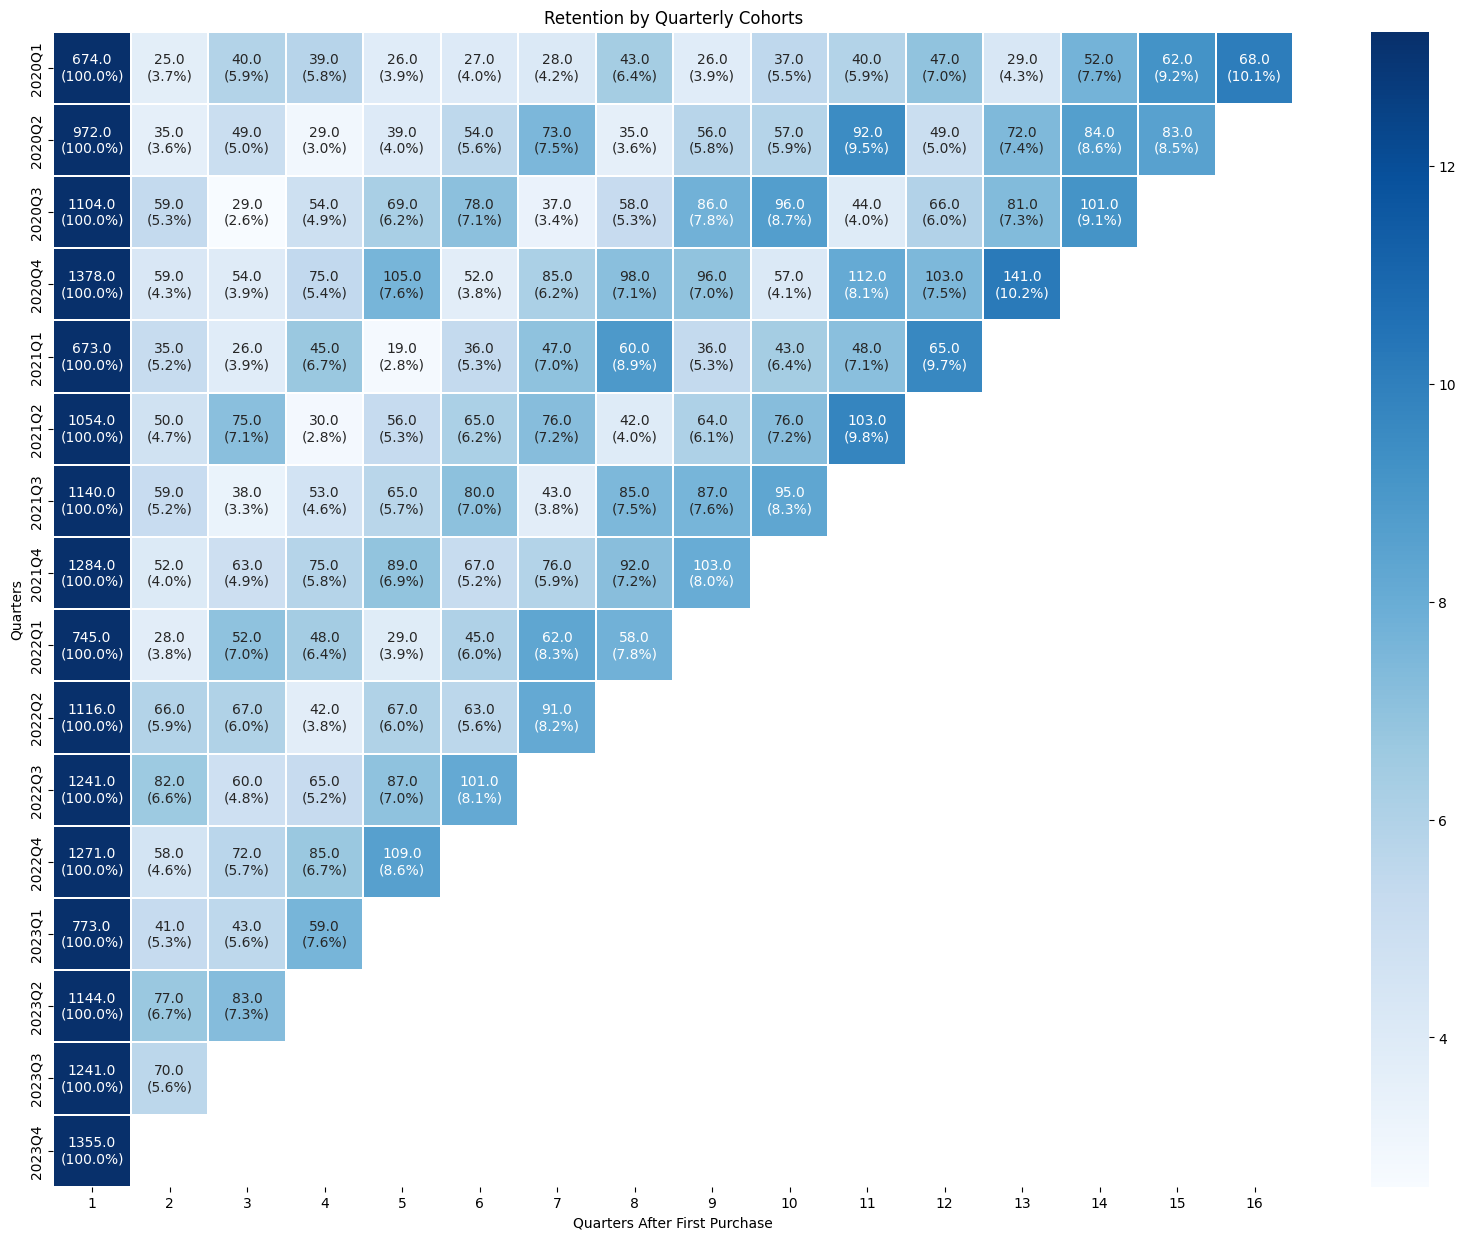

In [28]:
cohort = df.copy()

# Convert 'Order Date' to a period format for quarterly granularity
cohort['Order Quarter'] = cohort['Order Date'].dt.to_period('Q')

# Assign a cohort to each customer based on their first purchase date
cohort['Cohort Quarter'] = df.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('Q')

# Calculate the difference in months between the current transaction and the customer's first transaction
cohort['Cohort Index'] = (cohort['Order Quarter'] - cohort['Cohort Quarter']).apply(lambda x: x.n + 1)

# Get the count of unique customers in each cohort for each month
df_cohort = cohort.groupby(['Cohort Quarter', 'Cohort Index'])['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_counts = df_cohort.pivot(index='Cohort Quarter', columns='Cohort Index', values='Customer ID')

# Calculate retention as a percentage of the initial cohort size
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0) * 100

# Build annotations combining counts and percentages
annot = cohort_counts.astype(str) + "\n(" + retention.round(1).astype(str) + "%)"

# Visualize counts & retention cohort heatmap
# plt.figure(figsize = (40,35))       # For monthly cohorts
plt.figure(figsize = (20,15))
plt.title('Retention by Quarterly Cohorts')
sns.heatmap(retention.round(2), annot = annot, cmap = "Blues", vmax = list(retention.max().sort_values(ascending = False))[1]+3, fmt = '', linewidth = 0.3)
plt.xlabel('Quarters After First Purchase')
plt.ylabel('Quarters')
plt.show()


#### Insights
* Most cohorts lose 60% - 80% of their customers after the first quarter
* A few standout cohorts show above-average retention over time, particularly:
<br>
2020Q4, 2021Q3, 2021Q4, 2022Q1 & 2021Q3
* The best-performing cohorts retain 8–10% of customers as far as 8+ quarters out
* Recent cohorts (2023) show promising early retention, but longer-term behavior is yet to be confirmed

In [29]:
# Export cohort dataframe to .csv
cohort.to_csv(working_dir + 'cohort_analysis_data.csv', index=False)

# Recommendations
### Estimations based on the project’s customer counts, behavior, and margin patterns
* Retention improvement in Q2 across cohorts
<br>
Estimated Margin Gain: +€500K

* Reactivation of At-Risk and Can't Lose Them
<br>
Estimated Margin Gain: +€350K

* Conversion of Potential Loyalists
<br>
Estimated Margin Gain: +€400K


* Lower investment on Hibernating/Low-ROI segments
<br>
Estimated Margin Gain: +€120K

* Product & regional margin optimization
<br>
Estimated Margin Gain: +€250K
#### Total Margin Gain: ~€1.6M annually

# Next steps
* Further drill-down to find root causes
* Create a recommendations implementation roadmap
* Estimate costs for the implementation

# The End